# File and libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath = r'dataset/df_ecom_data_prep_encoded_v2.csv'


file_tag = "df_ecom_encoded"

# DSLabs functions

In [18]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

# Load

In [19]:
# test_data=True
test_data=False

if test_data==True:

    df=pd.read_csv(filepath)

    # 10% sample
    df=df.sample(frac=0.1, replace=False)
    

else:
    df=pd.read_csv(filepath)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197632 entries, 0 to 197631
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   event_type           197632 non-null  int64  
 1   category_code_lvl_1  177829 non-null  float64
 2   category_code_lvl_2  177828 non-null  float64
 3   category_code_lvl_3  177829 non-null  float64
 4   price                197632 non-null  float64
 5   conversion           197632 non-null  int64  
 6   week_of_month        197632 non-null  int64  
 7   is_weekend           197632 non-null  int64  
 8   day                  197632 non-null  int64  
 9   time_of_day_sin      197632 non-null  float64
 10  time_of_day_cos      197632 non-null  float64
 11  day_of_week_sin      197632 non-null  float64
 12  day_of_week_cos      197632 non-null  float64
 13  hour_sin             197632 non-null  float64
 14  hour_cos             197632 non-null  float64
 15  min_sin          

In [20]:
df.head()

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,11.0,57.0,125.0,390.22,0,3,0,26,0.0,1.0,0.500,0.866,0.817,-0.577,0.753,0.659
1,0,11.0,57.0,125.0,263.04,0,2,0,20,0.0,1.0,0.866,0.500,0.817,-0.577,0.000,1.000
2,0,5.0,38.0,90.0,19.05,0,3,0,26,-0.0,1.0,0.500,0.866,0.888,0.460,-0.461,-0.887
3,0,0.0,0.0,2.0,514.79,0,0,0,6,0.0,1.0,0.866,0.500,0.136,-0.991,-0.941,-0.339
4,0,7.0,50.0,104.0,17.76,0,1,0,8,0.0,-1.0,0.866,-0.500,-0.979,0.203,0.875,0.485


In [6]:
distinct_values = df.loc[df['conversion'] == 1, 'category_code_lvl_1'].unique()
print(distinct_values)



[ 2. 11.  0.  6.  3.  7.  5.  4. 12.  1. nan  9.  8. 10.]


In [7]:

num_records_per_category = df.loc[df['conversion'] == 1].groupby('category_code_lvl_1').size()
print(num_records_per_category)

category_code_lvl_1
0.0      702
1.0      192
2.0     1482
3.0      356
4.0       37
5.0      633
6.0      160
7.0      389
8.0       40
9.0        2
10.0       2
11.0    3202
12.0      59
dtype: int64


In [8]:
distinct_values = df.loc[df['conversion'] == 1, 'category_code_lvl_2'].unique()
print(distinct_values)

[16. 57.  0. 42. 20. 50. 15. 41. 17. 58. 24. 59. 38. 52.  9. 46. nan 36.
 18. 19.  6.  2. 55. 27.  1. 48. 45. 21. 32.  4. 54. 10. 14. 11. 53. 39.
 22.  7. 34. 40.  8.  5. 13. 37. 60. 44. 35. 49. 33. 26. 61. 43. 25. 23.
 47. 56.]


In [9]:
distinct_values = df.loc[df['conversion'] == 1, 'category_code_lvl_3'].unique()
print(distinct_values)

[ 54. 125.   2. 102.  61. 104.  53. 128.  87.   3.  55.  34.  47. 121.
  70. 132.  90. 106.  52.  20. 100.  nan  15.  85.  68.  30.  51.  63.
  10.   6. 119.  96.  37.  76.  93.   7.  95.   8. 109.  99.  58.  82.
  44.  41.  12.   9. 112.  39.  38.  28.   0. 116. 124.  64.  48.  57.
  24. 126. 107.  80.   5. 131.  69.  60.  22.  91.  19.   4.  94.  45.
  65.  92.  43.  83.  79.  31. 110. 123.  27.  23.  42.  13.  67.  36.
  97.  86. 133.  98.  46.  89. 105.  81.  75.  40. 134. 127.  32.  66.
 101.  74.  56.  71.  62. 111. 129.  59.  29. 103. 120.]


In [10]:
distinct_values = df.loc[df['conversion'] == 1, 'day_of_week_sin'].unique()
print(distinct_values)

[0.866 0.    1.    0.5  ]


# Missing Values Analysis

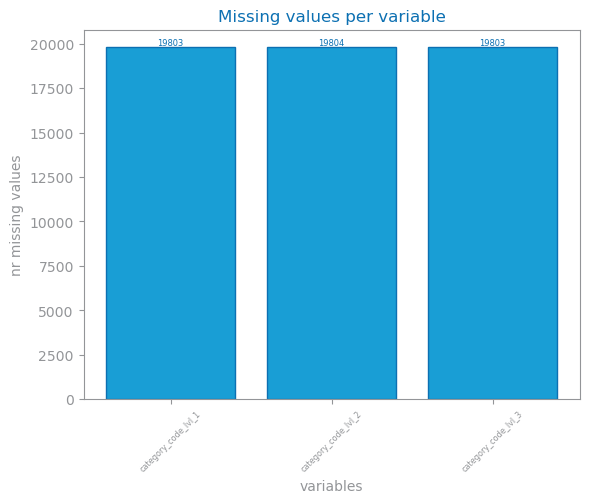

In [21]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_bar_chart


mv: dict[str, int] = {}
figure()
for var in df:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

In [81]:
print("Colunas do DataFrame de treino:", train.columns)
print("Colunas do DataFrame de teste:", test.columns)
print("Colunas do DataFrame de df_1:", df_1.columns)
print("Colunas do DataFrame de df:", df.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_purchase', 'time_of_day_cos', 'is_cart'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_purchase', 'time_of_day_cos', 'is_cart'],
      dtype='object')
Colunas do DataFrame de df_1: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view

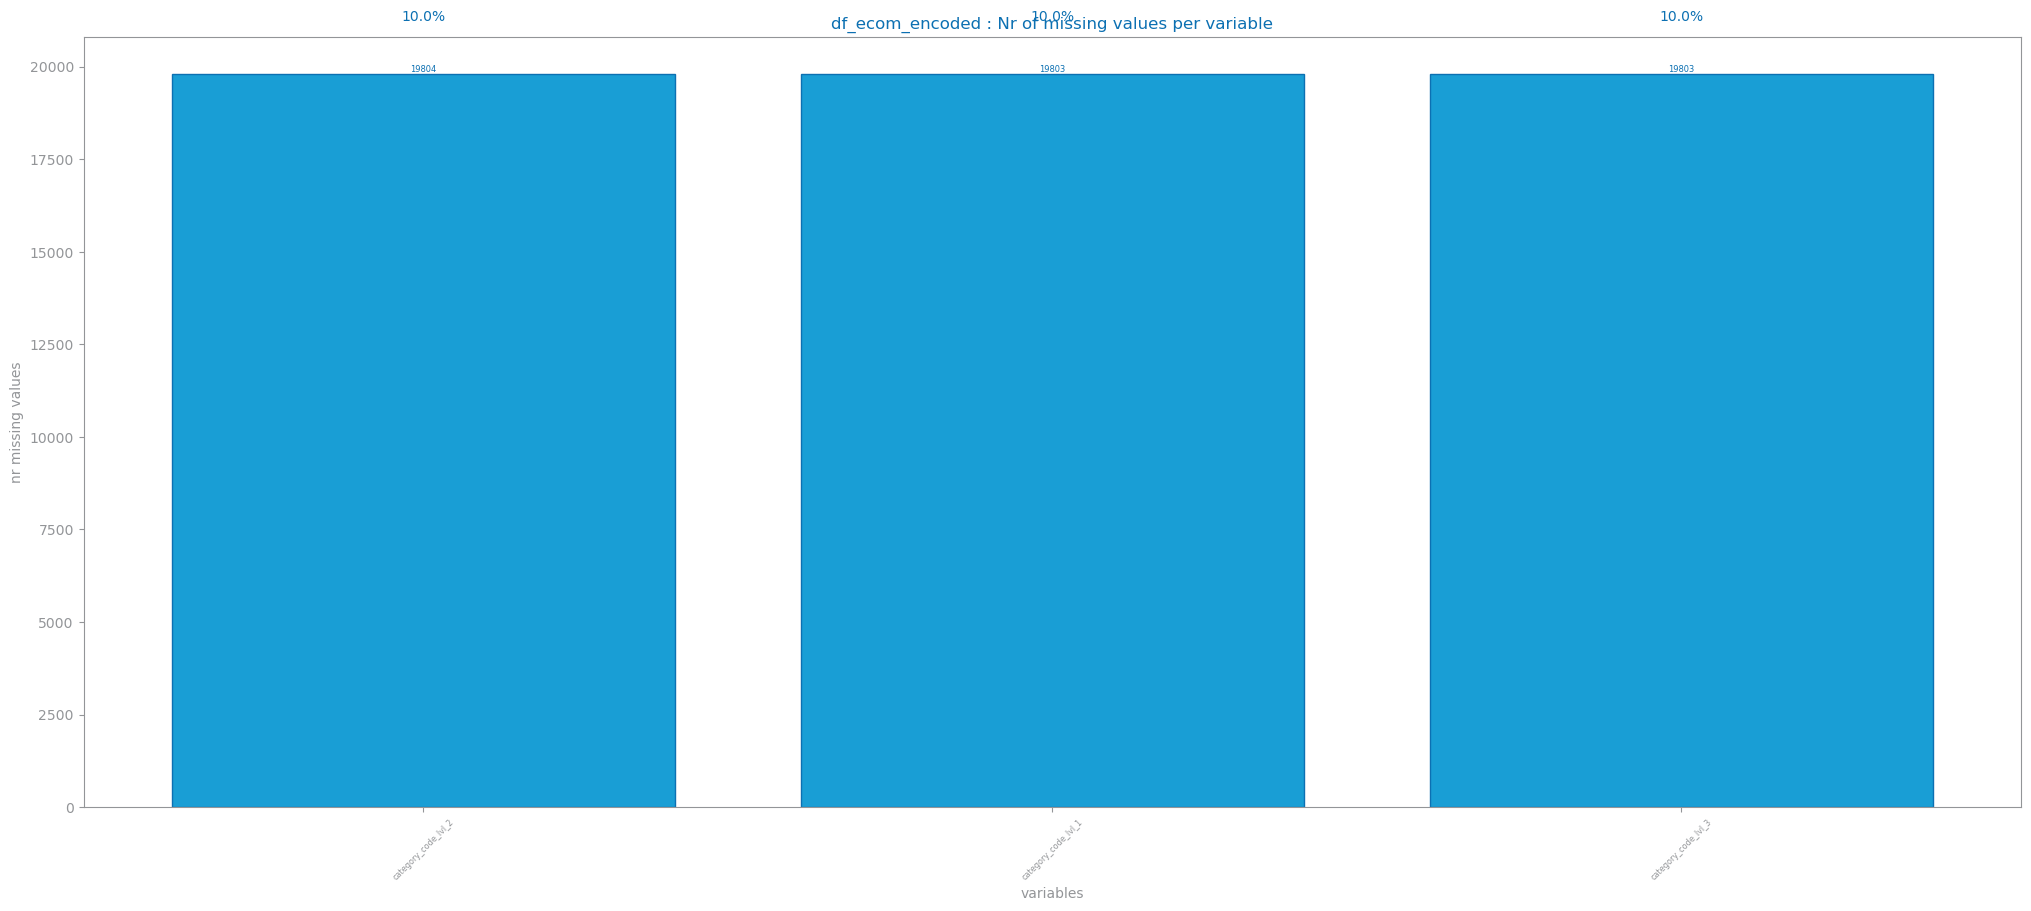

In [12]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - Most Frequent Srategy

## MV1 strategy aplication

In [22]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter
df_1 =  mvi_by_filling(df, strategy="frequent")

df_1.describe()

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,day,time_of_day_sin,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,conversion,is_weekend,time_of_day_cos
count,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.0,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000
mean,0.127479,5.374242,32.385451,76.852409,271.550282,1.900639,16.103612,0.0,0.561417,0.242129,0.003430,-0.262836,-0.003557,0.016947,0.039685,0.266389,0.198166
std,0.436577,3.942996,19.705410,40.190717,353.770417,1.213250,8.359449,0.0,0.381172,0.693449,0.750548,0.606384,0.701852,0.712112,0.195218,0.442071,0.980171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.0,0.000000,-0.866000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,15.000000,51.000000,51.460000,1.000000,10.000000,0.0,0.000000,-0.500000,-0.817000,-0.776000,-0.716000,-0.698000,0.000000,0.000000,-1.000000
50%,0.000000,5.000000,32.385451,76.852409,148.780000,2.000000,17.000000,0.0,0.500000,0.500000,0.000000,-0.335000,0.000000,0.080000,0.000000,0.000000,1.000000
75%,0.000000,11.000000,57.000000,124.000000,339.520000,3.000000,23.000000,0.0,0.866000,1.000000,0.817000,0.203000,0.678000,0.735000,0.000000,1.000000,1.000000
max,2.000000,12.000000,61.000000,134.000000,2574.070000,4.000000,29.000000,-0.0,1.000000,1.000000,0.998000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:

print("Colunas do DataFrame de df_1:", df_1.columns)

Colunas do DataFrame de df_1: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'is_purchase', 'time_of_day_cos'],
      dtype='object')


## MV1 target class

In [23]:
from numpy import array, ndarray
from pandas import read_csv, DataFrame

file_tag = "conversion"
target = "conversion"
labels: list = list(df_1[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(df_1[df_1[target] == negative]),
        len(df_1[df_1[target] == positive]),
    ]
}

y: array = df_1.pop(target).to_list()
X: ndarray = df_1.values

Labels=[0.0, 1.0]


In [24]:

print("Colunas do DataFrame de df_1:", df_1.columns)

Colunas do DataFrame de df_1: Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'day',
       'time_of_day_sin', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos', 'min_sin', 'min_cos', 'is_weekend', 'time_of_day_cos'],
      dtype='object')


## MV1 train/test split 

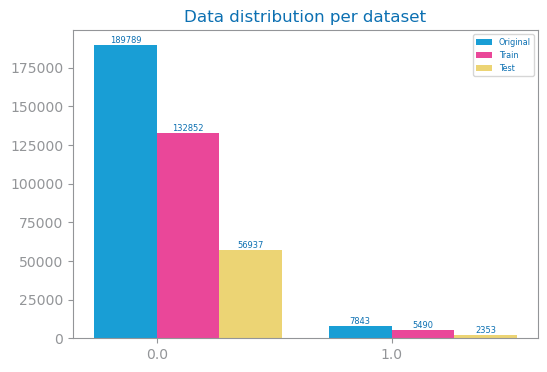

In [25]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=df_1.columns), DataFrame(trnY, columns=[target])], axis=1
)
train.to_csv(f"dataset/{file_tag}_train_df1.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=df_1.columns), DataFrame(tstY, columns=[target])], axis=1
)
test.to_csv(f"dataset/{file_tag}_test_df1.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [12]:
print("Train labels (trnY):", trnY)
print("Test labels (tstY):", tstY)

Train labels (trnY): [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [12]:
print("Colunas do DataFrame de treino:", train.columns)
print("Colunas do DataFrame de teste:", test.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')


In [26]:
from pandas import read_csv


def read_train_test_from_files(
    train_fn: str, test_fn: str, target: str = "class"
) -> tuple[ndarray, ndarray, array, array, list, list]:
    train: DataFrame = read_csv(train_fn, index_col=None)
    labels: list = list(train[target].unique())
    labels.sort()
    trnY: array = train.pop(target).to_list()
    trnX: ndarray = train.values

    test: DataFrame = read_csv(test_fn, index_col=None)
    tstY: array = test.pop(target).to_list()
    tstX: ndarray = test.values
    return trnX, tstX, trnY, tstY, labels, train.columns.to_list()


file_tag = "conversion"
train_filename = "dataset/conversion_train_df1.csv"
test_filename = "dataset/conversion_test_df1.csv"
target = "conversion"
eval_metric = "accuracy"

trnX: ndarray
tstX: ndarray
trnY: array
tstY: array
labels: list
vars: list
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=138342 Test#=59290
Labels=[0.0, 1.0]


## MV1 evaluate

In [14]:
print("Colunas do DataFrame de treino:", train.columns)
print("Colunas do DataFrame de teste:", test.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')


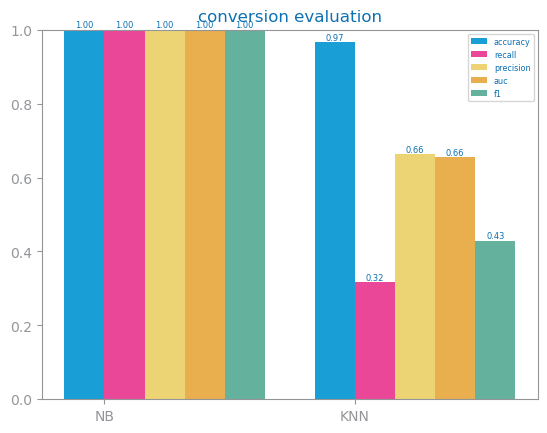

In [28]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "conversion"
file_tag = "conversion"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}_eval.png")
show()

# MV2 - drop null strategy

2. Remove remaining null values records

## MV2 strategy aplication

In [29]:
print("Dimensões antes da remoção:", df.shape)


Dimensões antes da remoção: (197632, 17)


In [30]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]
df_2 = df.dropna(axis=0, how="any")

# Depois de remover os missing values
print("Dimensões após a remoção:", df_2.shape)


Dimensões após a remoção: (177828, 17)


## MV2 target class

In [32]:
from numpy import array, ndarray
from pandas import read_csv, DataFrame

file_tag = "conversion"
target = "conversion"
labels: list = list(df_2[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(df_2[df_2[target] == negative]),
        len(df_2[df_2[target] == positive]),
    ]
}

y: array = df_2.pop(target).to_list()
X: ndarray = df_2.values

Labels=[0, 1]


## MV2 train/test split 

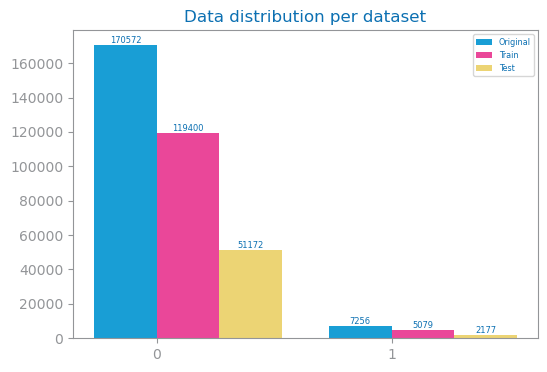

In [33]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=df_2.columns), DataFrame(trnY, columns=[target])], axis=1
)
train.to_csv(f"dataset/{file_tag}_train_df2.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=df_2.columns), DataFrame(tstY, columns=[target])], axis=1
)
test.to_csv(f"dataset/{file_tag}_test_df2.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [34]:
from pandas import read_csv


def read_train_test_from_files(
    train_fn: str, test_fn: str, target: str = "class"
) -> tuple[ndarray, ndarray, array, array, list, list]:
    train: DataFrame = read_csv(train_fn, index_col=None)
    labels: list = list(train[target].unique())
    labels.sort()
    trnY: array = train.pop(target).to_list()
    trnX: ndarray = train.values

    test: DataFrame = read_csv(test_fn, index_col=None)
    tstY: array = test.pop(target).to_list()
    tstX: ndarray = test.values
    return trnX, tstX, trnY, tstY, labels, train.columns.to_list()


file_tag = "conversion"
train_filename = "dataset/conversion_train_df2.csv"
test_filename = "dataset/conversion_test_df2.csv"
target = "conversion"
eval_metric = "accuracy"

trnX: ndarray
tstX: ndarray
trnY: array
tstY: array
labels: list
vars: list
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=124479 Test#=53349
Labels=[0, 1]


## MV2 evaluate

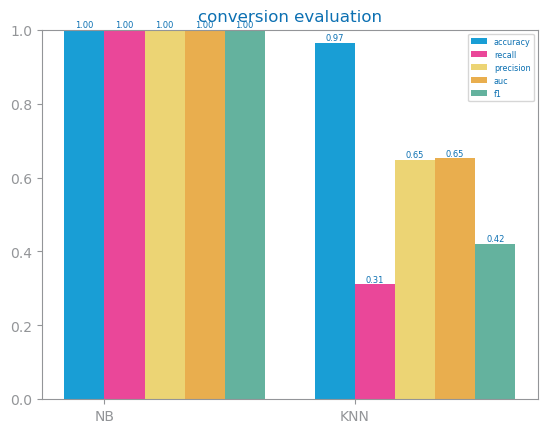

In [35]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "conversion"
file_tag = "conversion"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
#savefig(f"images/{file_tag}_eval.png")
show()

# Analysis

- we will move forward with approach 1 for missing values due to slightly better results on recall and more records dimensionality

# save to csv

In [27]:
if test_data==False:
    
    # train_2.to_csv(f"data/df_merch_3_mv_input_train.csv", index=False)
    # test_2.to_csv(f"data/df_merch_3_mv_input_test.csv", index=False)
    df_1.to_csv(f"dataset/df_ecom_2_2_mv_input_v2_dummyfication.csv", index=False)
    

# save to csv

In [ ]:
# # choose final version
# data_final=data_1

# # Saving to CSV files
# data_final.to_csv('data/df_merch_mv_input.csv',index=False)
